In [0]:
# Cluster 2018

# clase_01: EDA : Analisis Exploratorio de los Datos

Que vamos a aprender hoy:
    - Descripcion del data-set
    - Histograma 
    - Distribucion normal y skew
    - Correlacion de variables
    - Datos categoricos
    - Box plot
    - Heat-map 
    - Scatter Plot
    - Estandarizacion de datos
    - Datos faltantes (missing data)
    - Null values
    - Outliers
    - Extra: variables dummy

**Data-set:** House Prices: Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Descargamos el archivo train.csv

## Objetivo



Con 79 variables explicativas que describen (casi) todos los aspectos de los hogares residenciales en Ames (Iowa, Estados Unidos) el data-set tiene como objetivo final predecir el precio final de cada casa y luego usar el predictor en otras ciudades similares. 

Pero antes de predecir debemos conocer como son los datos, como se comportan las features y que preguntas podemos responder. Para eso vamos a utilizar el llamado EDA (Exploratory Data Analysis).

## Librerias y data-set

In [0]:
#Importar paquetes de herramientas: Tener en cuenta que un EDA incluye el analisis de datos y graficar para contar la historia!

#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocessing 
from sklearn.preprocessing import StandardScaler
#Otros 
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import Image

### Antes de comenzar, donde entra el EDA en todo esto?

![Axis diagram](https://cdn-images-1.medium.com/max/1000/1*K5LP-pkEzHx0S3ZnJKGJWQ.png)

In [0]:
#Importamos los datos en csv
df_train = pd.read_csv(r'C:\Users\avelazquez\Downloads\train.csv')

#1 - Antes del path, muchas veces debemos colocar la r (raw), ya que Python usa tambien el backslash para indicar caracteres 
#especiales, por ejemplo \n signigica newline.
#2 -  No se especifico un delimiter ya que por default con read_csv es ;
# Para mas informacion siempre consultar la documentacion de la libreria : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [0]:
# Con el comando head() podemos verificar que se cargo correctamente el data-set
df_train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [0]:
#Un poco mas de info...
df_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [0]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
shape = df_train.shape # Shape es un atributo (caracteristica del objeto) no un metodo (funcion), no lleva parentesis!
print(shape)
# Por default Jupyter no muestra todas las sentencias de la celda (solo la ultima) de esta manera debemos separar la linea
# de codigo en diferentes celdas, para el otro caso se debe importar el paquete InteractiveShell

(1460, 81)


## Missing data

Principalmente debemos responder dos preguntas:

1- Cuan importante es la cantidad de nulos?

2- Tienen algun patron?

In [0]:
# Evaluamos que columnas (features) tienen mas datos nulos
# Utilizamos varias funciones de pandas: isnull, sum, sort_values, count, concat y head
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [0]:
#Que hacemos con los valores nulos
# Los eliminamos?
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1) # eliminamos las columnas 
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index) # eliminamos el registro
df_train.isnull().sum().max() #chequeamos que no haya otro valor nulo haciendo el maximo de la suma de cada columna

0

In [0]:
# Verificamos como quedo el data-set
df_train.shape 

(1459, 63)

Esta bien lo que acabamos de hacer?

No lo sabemos a ciencia cierta pero tenemos nuestros supuestos:

 - Consideraremos que cuando falta más del 15% de los datos, debemos eliminar la variable correspondiente y pretender que nunca existió. Esto significa que no intentaremos ningún truco para completar los datos faltantes en estos casos. 
 - Hay un conjunto de variables (por ejemplo, 'PoolQC', 'MiscFeature', 'Alley', etc.) que debemos eliminar. Son importantes? Son tenidas en cuenta al comprar una casa? Por que estan en nulos? Son features que nos pueden dar valores atipicos? Evaluemos la descripcion de los datos.
 - Que pasa con todas las variables GarageX y BsmtX? Son importantes?
 - Y con 'MasVnrArea' y 'MasVnrType' hay correlacion con alguna otra variable? Perdemos informacion si la eliminamos? 
 - Que hacemos con Electrical?
 
Que otros metodos de tratamiento de valores nulos existen?

Por que hicimos esto?

De que nos sirve?

 - Muchos test y metodos estadisticos se basan en la normalidad de las variables 
 - Podemos evitar futuros problemas (ej. heteroscedacity: diferente rango de varianza a lo largo de sus variables predictoras)
 - Importante: De esta manera no aseguramos normalidad con respecto a todas las variables!
 - El analisis puede ser mucho mas completo pero por ahora lo dejamos aca.

## Correlacion de variables

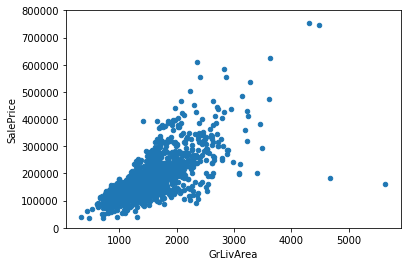

In [0]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

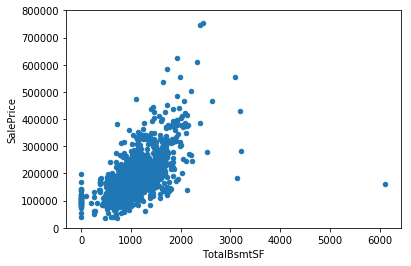

In [0]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## Datos categoricos y Box plot

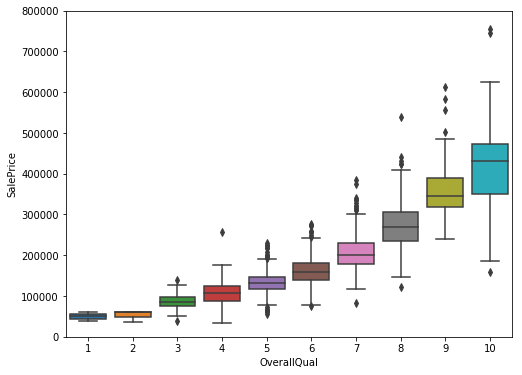

In [0]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

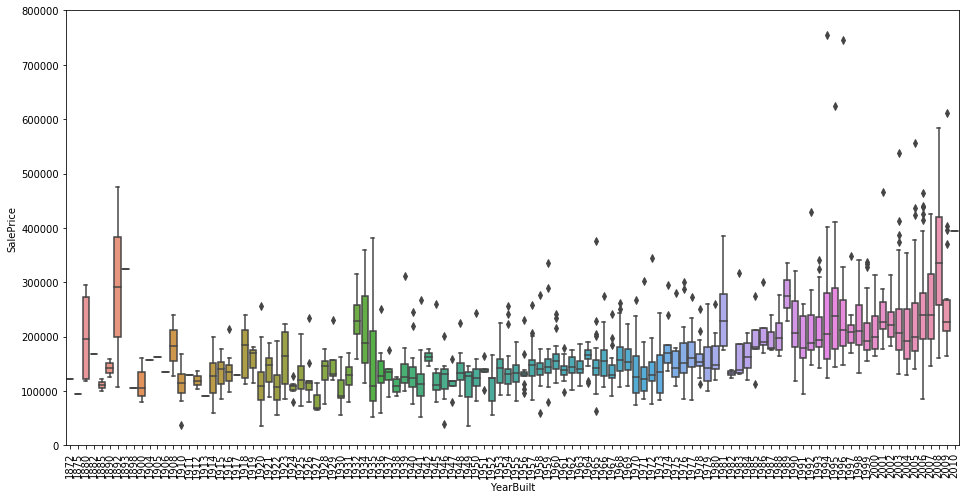

In [0]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## Heat-map 

In [0]:
print("Variables mas importantes con respecto a nuestro objetivo")
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Variables mas importantes con respecto a nuestro objetivo
SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
YearRemodAdd     0.507430
Fireplaces       0.466968
BsmtFinSF1       0.386436
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
ScreenPorch      0.111419
PoolArea         0.092397
MoSold           0.046380
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
BsmtHalfBath    -0.016873
MiscVal         -0.021200
Id              -0.021756
LowQualFinSF    -0.025620
YrSold          -0.028907
OverallCond     -0.077924
MSSubClass      -0.084230
EnclosedPorch   -0.128627
KitchenAbvGr    -0.135935
Name: SalePrice, dtype: float64


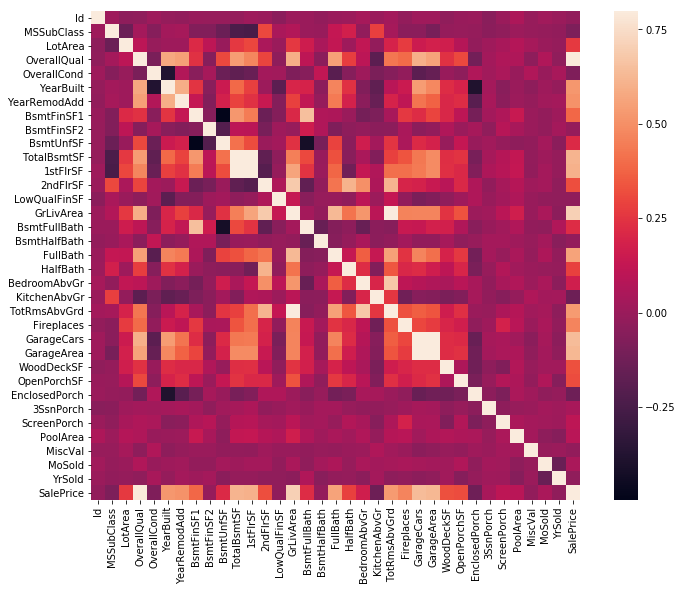

In [0]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

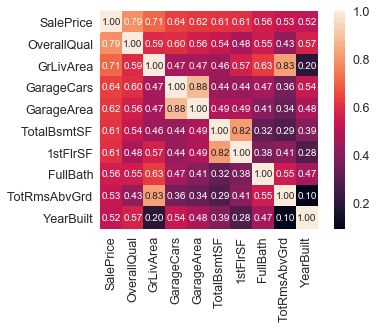

In [0]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Scatter Plot

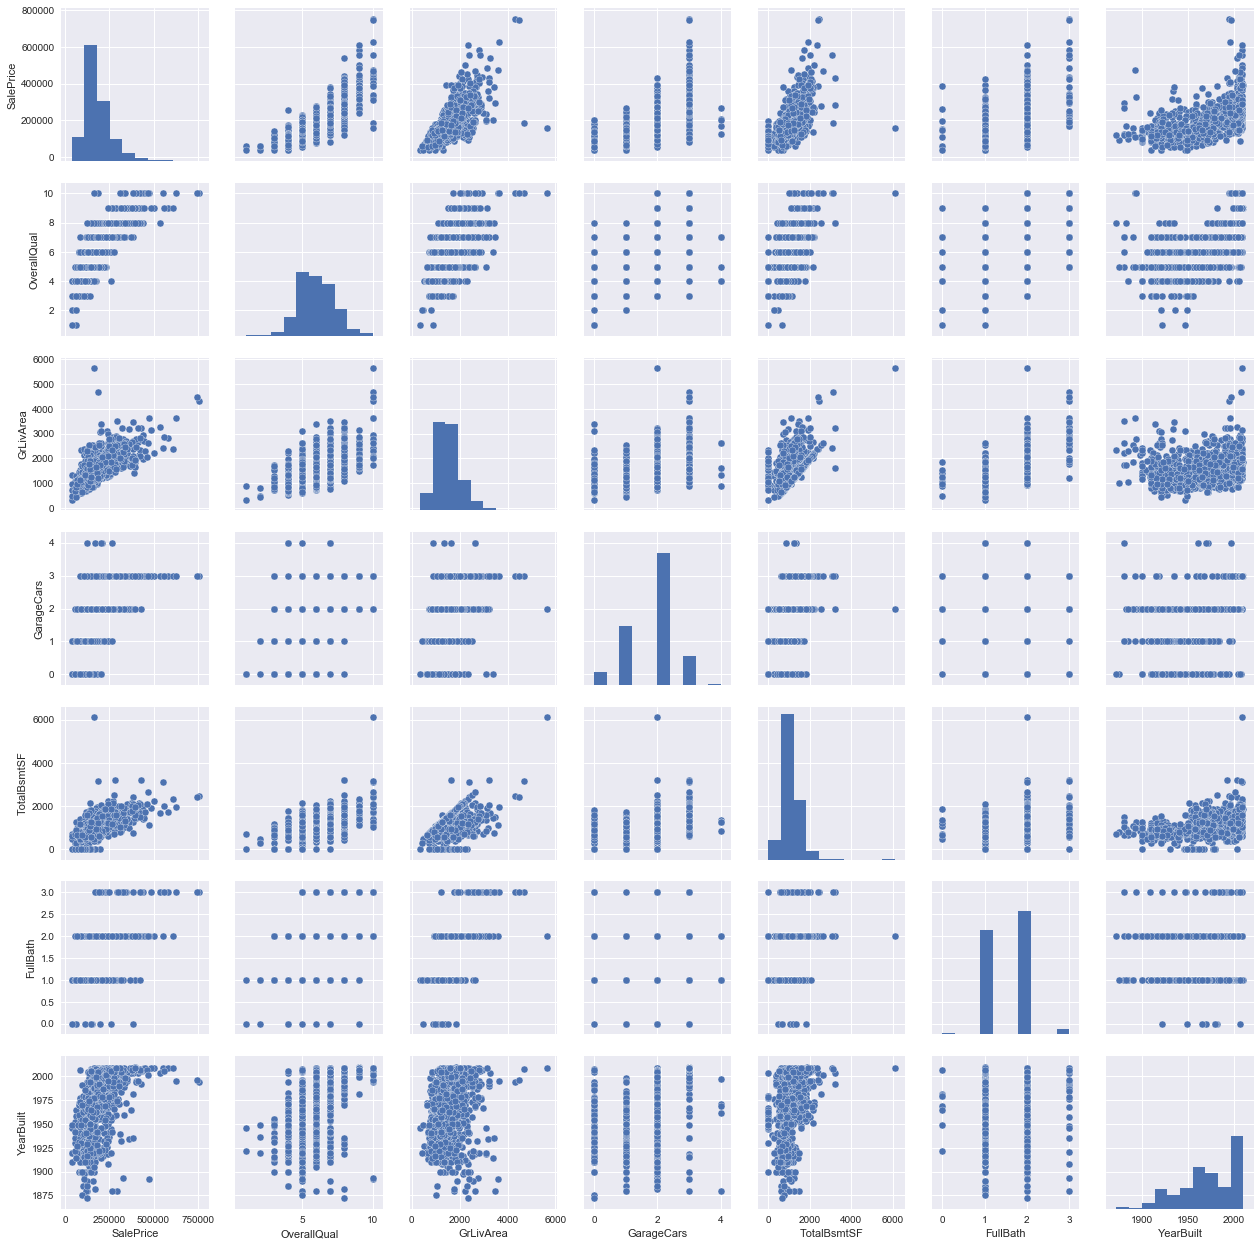

In [0]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

### Que pasa con los scatter-plott que se ven de la siguiente manera? 

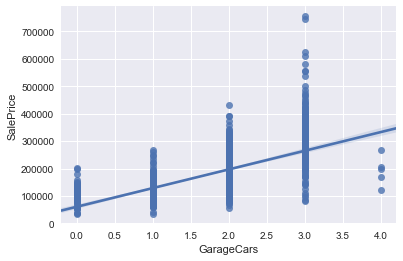

In [0]:
#scatterplot
ax = sns.regplot(y='SalePrice', x='GarageCars', data=df_train)
plt.show()

## Outliers and data standardization

Que podemos hacer con los outliers? 

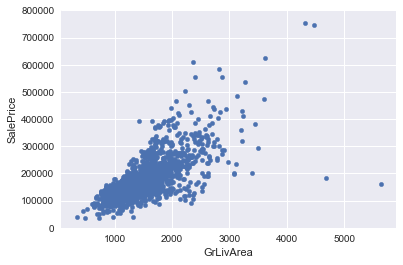

In [0]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Hay algunos valores grande de GrLivArea que siguen una tendencia y otros que no, por eso consideramos a los que no como outliers

### To Drop or Not to Drop

1 - Sabemos is es un error de medicion? QUe sabemos de los datos

2- Cambia nuestros supuestos?

3- Afecta nuestros resultados?


In [0]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

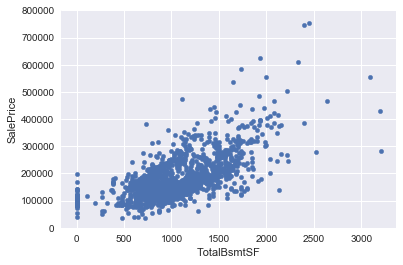

In [0]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Data standarization:  Means converting data values to have mean of 0 and a standard deviation of 1.

In [0]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]); # np.newaxis lo usamos para darle la dimension columna a nuestor datos
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10] # argsort me devuelve los indices del array al cual estoy aplicando la funcion
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Que pasa con los valores 7.1 y 7.22 ?

In [0]:
# Otra opcion en lugar de newaxis es utilizar reshape
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'].reshape(-1,1));
saleprice_scaled.shape

(1459L, 1L)

## Volvamos a nuestro objetivo: Sale Price

In [0]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1457.000000
mean     180942.138641
std       79521.569966
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

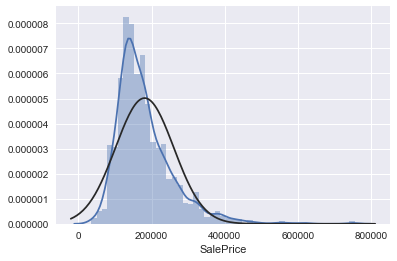

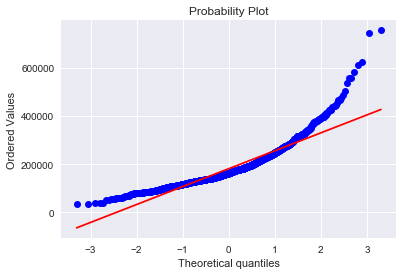

In [0]:
#histograma y grafico de probabilidad normal
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Es una especie de distribucion normal pero tiene un corrimiento y esta muy concentrada...

Pero no todo esta perdido, en caso de un desvio positivo podemos aplicar una transformacion logaritimica, es decir un cambio de escala de los datos. 

In [0]:
# Dos amigos Skewness y Kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.880363
Kurtosis: 6.516048


In [0]:
#transformacion logaritmica
df_train['SalePrice'] = np.log(df_train['SalePrice'])

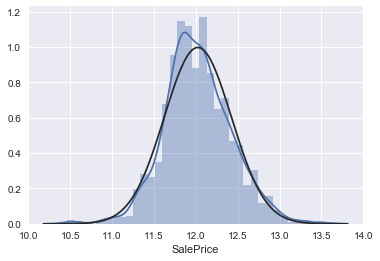

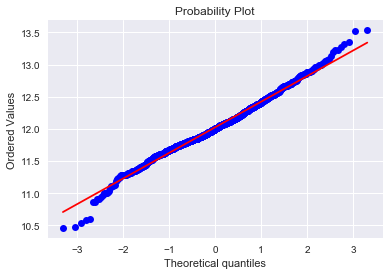

In [0]:
# y como un truco de magia...
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

### Pero... por que queremos que los datos sean normales?

## Dummies para datos categoricos

Los dummies es una forma de incorporar variables nominales en el análisis de regresión


In [0]:
# Convert categorical data into dummy 
df_train = pd.get_dummies(df_train) # Convert categorical variable into dummy/indicator variables

## Mas preguntas por resolver!



- Cuales son los barrios mas caros?
- En que temporadas del año se venden mas casas?
- Cual es la correlacion entre la calidad de la cocina y el precio de venta?
- Variacion de precio de venta por zona?
- Perdimos realmente informacion eliminando a'MasVnrArea' y 'MasVnrType' ? Con cual se correlaciona?